# Data Cleaning

### Import libraries

In [137]:
import pandas as pd
import json as json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Read CSV

In [138]:
df = pd.read_csv("../scraping/parking-data-sg/final/pp_sg.csv", sep=";")
df['datetime_formatted'] = pd.to_datetime(df['datetime'], format='%d.%m.%Y %H:%M')
df.describe()

,P24,P44,P42,P33,P23,P25,P21,P31,P54,P53,...,P41,ferien,feiertag,covid_19,olma_offa,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,datetime_formatted
count,134359.000000,134359.000000,134359.000000,134359.000000,134359.000000,134359.000000,134359.000000,134359.000000,134359.0,134359.000000,...,134359.0,134361.000000,134361.000000,134361.000000,134361.000000,134361.000000,134361.000000,134361.000000,134361.000000,134361
mean,199.697958,231.368602,170.050737,80.188019,91.831437,235.548382,201.113286,91.945690,0.0,54.469920,...,0.0,0.258892,0.030344,0.417316,0.041932,14.374133,6.435864,4.017237,0.282483,2021-11-24 07:55:55.361154048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,-3.999000,-18.249000,0.000000,0.000000,2019-10-01 15:27:00
25%,151.000000,156.000000,110.000000,37.000000,47.000000,182.000000,134.000000,52.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,8.401000,1.401000,0.000000,0.000000,2020-09-21 09:43:00
50%,229.000000,238.000000,187.000000,89.000000,118.000000,251.000000,243.000000,108.000000,0.0,66.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,14.551000,6.551000,0.700000,0.000000,2021-12-26 13:26:00
75%,252.000000,279.000000,232.000000,112.000000,128.000000,307.000000,259.000000,129.000000,0.0,96.000000,...,0.0,1.000000,0.000000,1.000000,0.000000,20.501000,12.151000,5.700000,0.000000,2022-12-14 16:55:00
max,82750.000000,42900.000000,56932.000000,22839.000000,29459.000000,111878.000000,85729.000000,35086.000000,0.0,18354.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,32.301003,20.451000,67.600000,23.939995,2023-11-09 06:26:00
std,306.207551,260.529622,249.210545,94.258416,131.486076,391.695722,307.452237,140.191298,0.0,86.432702,...,0.0,0.438028,0.171532,0.493118,0.200434,7.470731,6.551421,7.099695,1.246384,NaN


### Remove outliers

We see i.e. outliers in max parking data.

#### Remove outliers from parking data

In [139]:
# Import Metadata
json_dir = '../metadata/metadata.json'
with open(json_dir, 'r', encoding='utf8') as f:
    metadata = json.load(f)

In [140]:
condition = lambda cols: cols.startswith("P")
colnames = [cols for cols in df.columns if condition(cols)]

for name in colnames:
    df.drop(df[df[name] > metadata['parking_sg']['fields'][name]['max_cap']].index, inplace=True)

df.describe()

,P24,P44,P42,P33,P23,P25,P21,P31,P54,P53,...,P41,ferien,feiertag,covid_19,olma_offa,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,datetime_formatted
count,55852.000000,55852.000000,55852.000000,55852.000000,55852.000000,55852.000000,55852.000000,55852.000000,55852.0,55852.000000,...,55852.0,55854.000000,55854.000000,55854.000000,55854.000000,55854.000000,55854.000000,55854.000000,55854.000000,55854
mean,142.625224,174.287814,125.458354,56.568323,56.250430,180.703592,137.016991,57.499606,0.0,44.530957,...,0.0,0.242543,0.023687,0.398951,0.056236,14.252911,6.333118,3.926004,0.298265,2021-12-05 06:39:16.964228096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,-3.999000,-14.049000,0.000000,0.000000,2019-10-02 07:25:00
25%,91.000000,107.000000,86.000000,22.000000,20.000000,132.000000,88.000000,26.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,8.551000,1.401000,0.000000,0.000000,2020-10-05 17:44:45
50%,142.000000,177.000000,115.000000,51.000000,44.000000,188.000000,128.000000,49.000000,0.0,57.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,14.351000,6.351000,0.700000,0.000000,2022-01-13 12:03:30
75%,195.000000,237.000000,169.000000,93.000000,96.000000,240.000000,183.000000,85.000000,0.0,75.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,20.251000,11.901000,5.700000,0.000000,2022-12-16 16:37:15
max,275.000000,447.000000,292.000000,170.000000,132.000000,369.000000,274.000000,138.000000,0.0,110.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,31.801000,20.401000,67.600000,23.939995,2023-11-09 06:26:00
std,64.440850,90.099662,63.762311,41.049387,43.517425,84.074639,64.466941,38.629403,0.0,37.065147,...,0.0,0.428625,0.152073,0.489687,0.230379,7.379811,6.428814,6.855619,1.284303,NaN


#### Remove P54 and P41

In [141]:
# Both not in use for whole time
df = df.drop(['P54', 'P41'], axis=1)

#### Remove NaN / Null values

Check how many NaN / Null values there are:

In [142]:
df.isnull().sum().sum()

28

Remove them

In [143]:
df = df.dropna()

Check how many NaN / Null values there are after cleaning (should be 0):

In [144]:
df.isnull().sum().sum()

0

#### TODO other various data cleaning stuff

In [145]:
# TODO

### Plot data

In [146]:
colnames = [cols for cols in df.columns if cols.startswith("P")]


def plot_time_series(start_date, end_date, with_consistent_dates=False):
    time_limited_df = df[(df['datetime_formatted'] >= start_date) & (df['datetime_formatted'] <= end_date)]

    if with_consistent_dates:
        time_limited_df.plot(x='datetime_formatted', y=colnames, figsize=(20, 10), grid=True)

        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        plt.gcf().autofmt_xdate()
    else:
        time_limited_df.plot(x='datetime', y=colnames, figsize=(20, 10), grid=True)

    plt.title(f'Time Series Plot ({start_date} - {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Free parking spaces')

    plt.show()

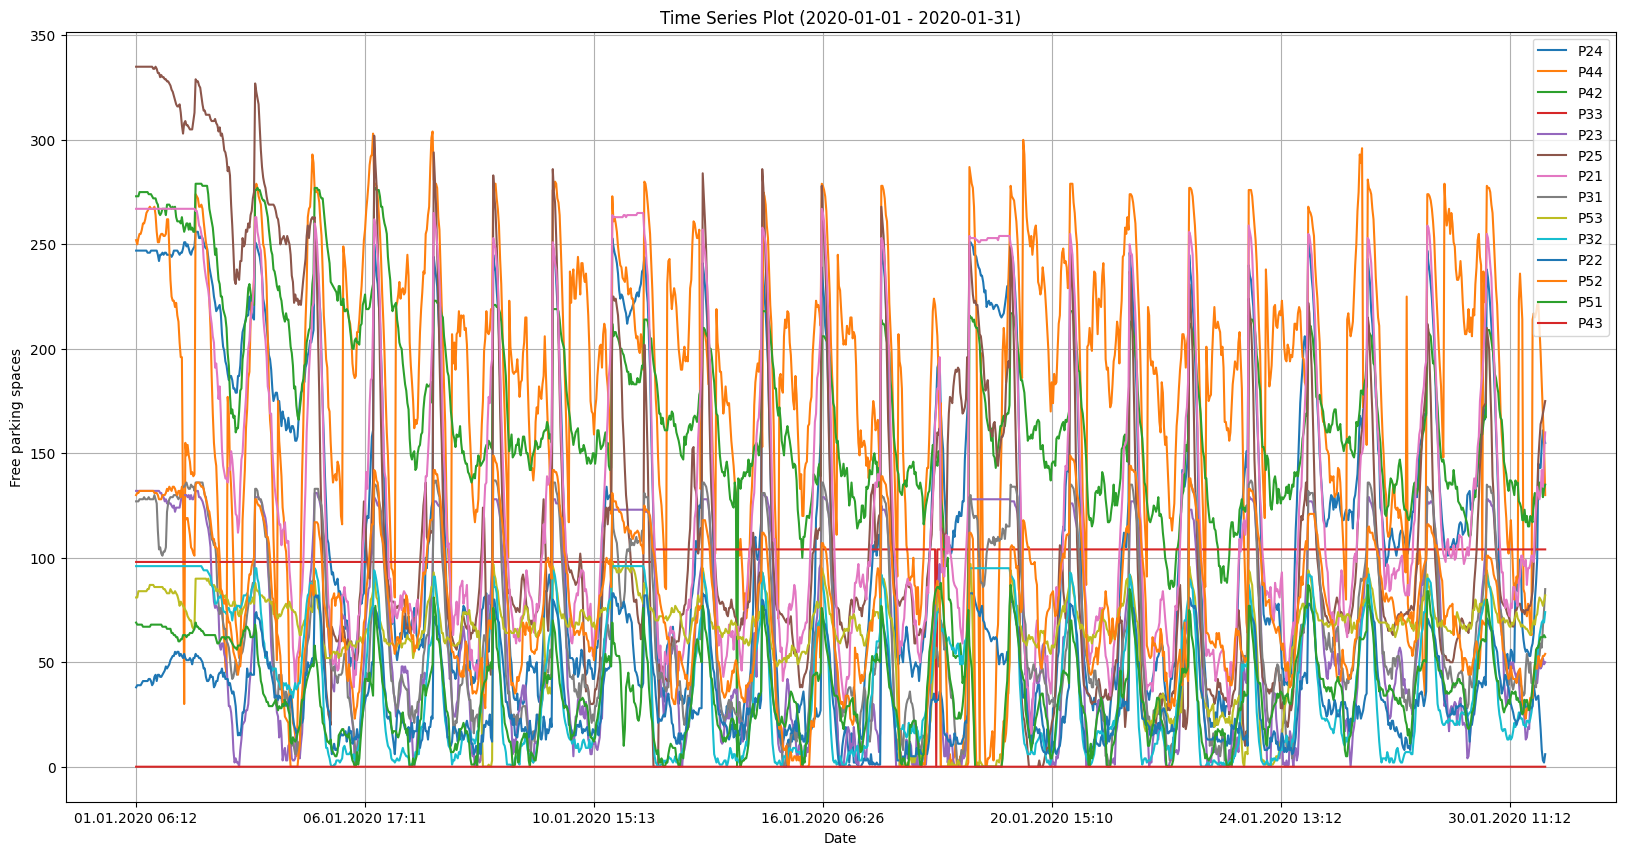

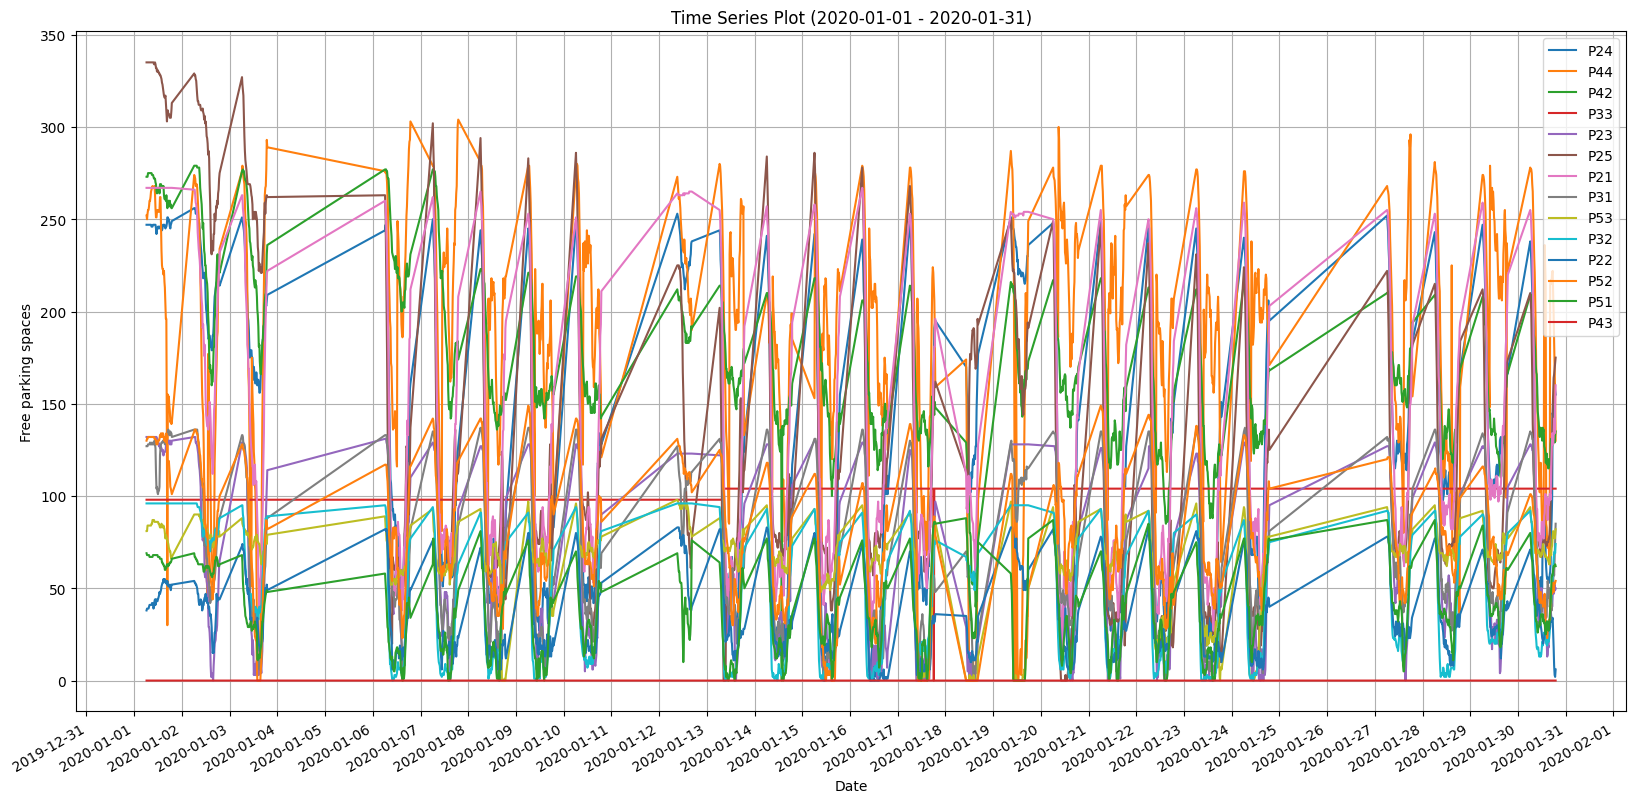

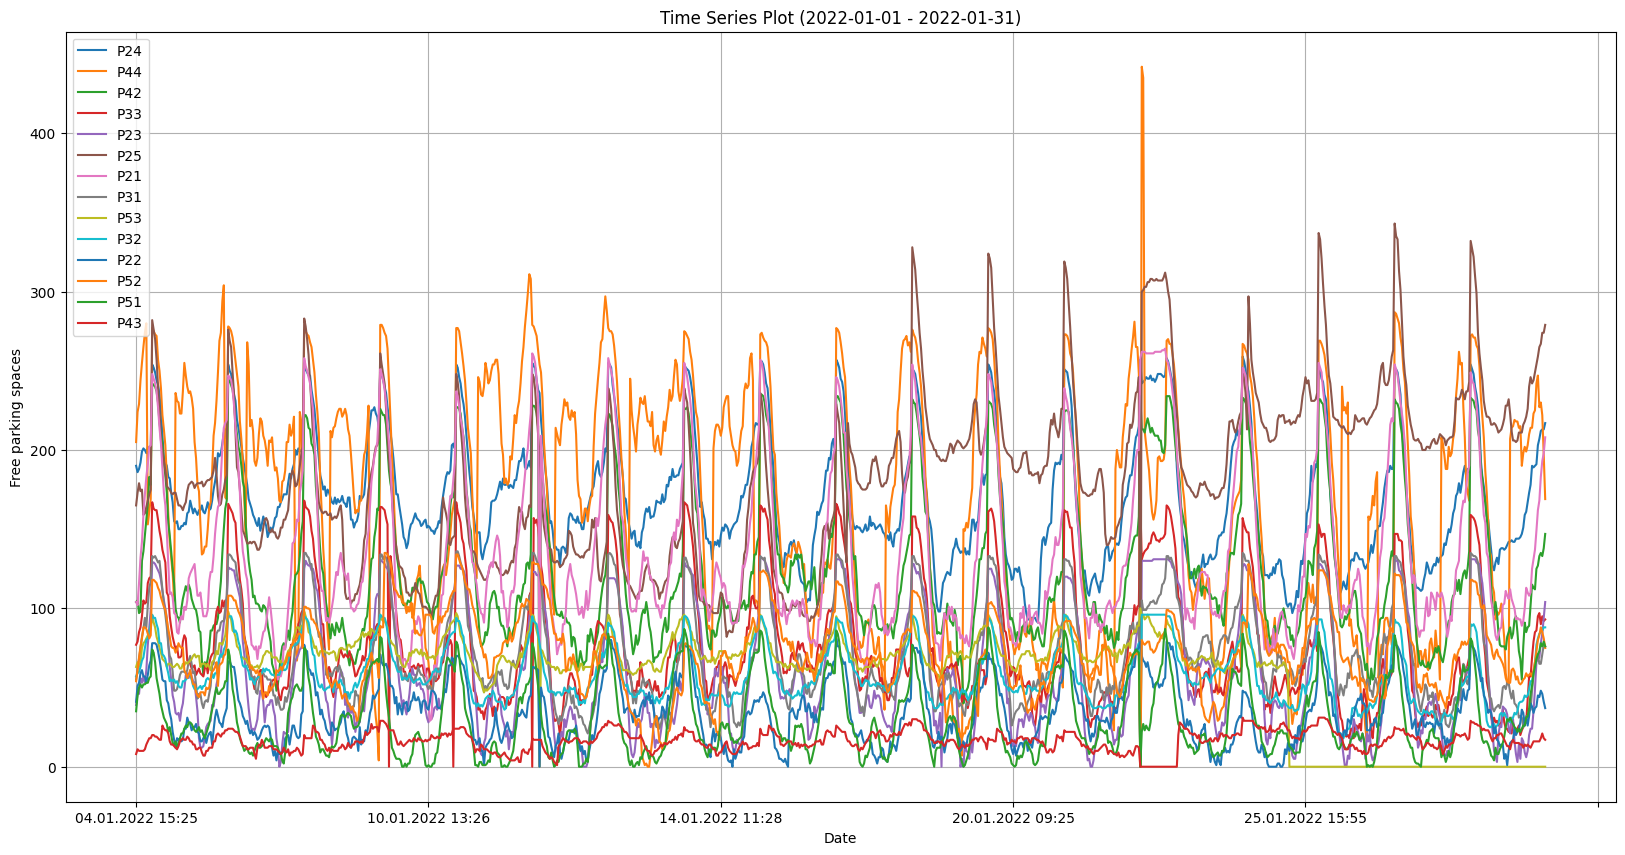

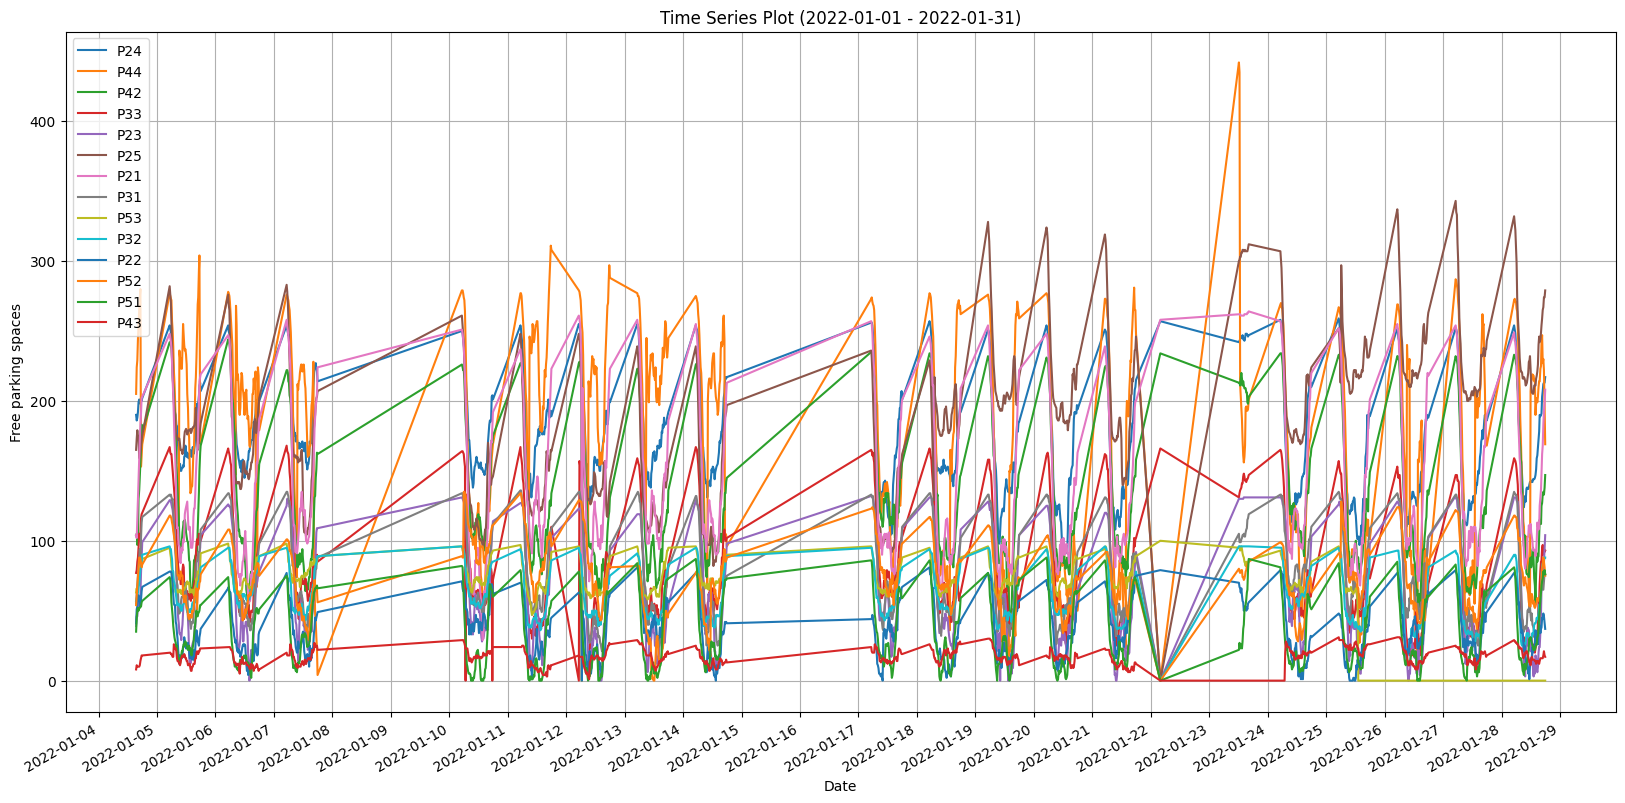

In [147]:
# TODO decide what to plot
plot_time_series('2020-01-01', '2020-01-31')
plot_time_series('2020-01-01', '2020-01-31', with_consistent_dates=True)
plot_time_series('2022-01-01', '2022-01-31')
plot_time_series('2022-01-01', '2022-01-31', with_consistent_dates=True)

### Write CSV

In [148]:
outputfile_train = "01_pp_sg_train_cleaned.csv"
outputfile_test = "01_pp_sg_test_cleaned.csv"

df.describe()

,P24,P44,P42,P33,P23,P25,P21,P31,P53,P32,...,P43,ferien,feiertag,covid_19,olma_offa,temperature_2m_max,temperature_2m_min,rain_sum,snowfall_sum,datetime_formatted
count,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,...,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850.000000,55850
mean,142.624781,174.290492,125.458371,56.568021,56.251298,180.703617,137.017296,57.499499,44.530188,41.188201,...,13.456097,0.242525,0.023688,0.398908,0.056240,14.252661,6.332710,3.925723,0.298286,2021-12-05 07:25:12.872336640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-3.999000,-14.049000,0.000000,0.000000,2019-10-02 07:25:00
25%,91.000000,107.000000,86.000000,22.000000,20.000000,132.000000,88.000000,26.000000,0.000000,14.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,8.551000,1.401000,0.000000,0.000000,2020-10-05 18:00:00
50%,142.000000,177.000000,115.000000,51.000000,44.000000,188.000000,128.000000,49.000000,57.000000,38.000000,...,14.000000,0.000000,0.000000,0.000000,0.000000,14.351000,6.351000,0.700000,0.000000,2022-01-13 12:33:30
75%,195.000000,237.000000,169.000000,93.000000,96.000000,240.000000,183.000000,85.000000,75.000000,66.000000,...,21.000000,0.000000,0.000000,1.000000,0.000000,20.251000,11.901000,5.700000,0.000000,2022-12-16 16:52:15
max,275.000000,447.000000,292.000000,170.000000,132.000000,369.000000,274.000000,138.000000,110.000000,96.000000,...,32.000000,1.000000,1.000000,1.000000,1.000000,31.801000,20.401000,67.600000,23.939995,2023-11-09 06:26:00
std,64.441914,90.100141,63.763165,41.049898,43.517942,84.076123,64.468073,38.630088,37.065576,29.849714,...,9.567756,0.428614,0.152078,0.489678,0.230387,7.379516,6.428619,6.855773,1.284346,NaN


#### Write Train CSV

In [151]:
df_train = df[df['datetime_formatted'] < '2023-03-01']
df_train = df_train.drop(['datetime_formatted'], axis=1) # TODO decide whether to drop or not
df_train.to_csv(outputfile_train, sep=";", index=False)

#### Write Test CSV

In [152]:
df_test = df[df['datetime_formatted'] >= '2023-03-01']
df_test = df_test.drop(['datetime_formatted'], axis=1) # TODO decide whether to drop or not
df_test.to_csv(outputfile_test, sep=";", index=False)